In [41]:
import csv

import numpy as np
import wandb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BATCHES_PER_EPOCH = 97

In [3]:
api = wandb.Api()

In [4]:
def get_sweep_dataframe(sweep_id, project_id='k-dropout'):
    sweep = api.sweep(f'{project_id}/{sweep_id}')

    run_data = []
    for run in sweep.runs:
        run_data.append({
            'run_id': run.id,
            'name': run.name,
            'state': run.state,
            **run.config,
            **run.summary,
        })
    return pd.DataFrame(run_data)

### Cifar sequential sweep over k and m

In [5]:
df = get_sweep_dataframe('w1f4uxpq')
df.head()

run_id                                               name     state  \
0  d4vhf51v  cifar10_sequential_k=29100_m=512_p=0.5_lr=0.00...  finished   
1  z751z4ur  cifar10_sequential_k=29100_m=128_p=0.5_lr=0.00...  finished   
2  5sxg5jjs  cifar10_sequential_k=29100_m=64_p=0.5_lr=0.000...  finished   
3  nulu5vr0  cifar10_sequential_k=29100_m=8_p=0.5_lr=0.0005...  finished   
4  oke7yut3  cifar10_sequential_k=29100_m=1_p=0.5_lr=0.0005...  finished   

       k    m    p      lr  seed device  epochs  ...  test_batch_size  \
0  29100  512  0.5  0.0005   282   cuda     300  ...              512   
1  29100  128  0.5  0.0005   282   cuda     300  ...              512   
2  29100   64  0.5  0.0005   282   cuda     300  ...              512   
3  29100    8  0.5  0.0005   282   cuda     300  ...              512   
4  29100    1  0.5  0.0005   282   cuda     300  ...              512   

   preprocess_dataset     _step            _wandb    _runtime  test_acc  \
0               False  14899200  {'runtime': 190}  191.015313  0.520765   
1               False  14899200  {'runtime': 190}  190.711411  0.530325   
2               False  14899200  {'runtime': 189}  190.210237  0.534848   
3               False  14899200  {'runtime': 472}  472.683051  0.541632   
4               False  14899200  {'runtime': 190}  191.167906  0.548931   

    test_loss    _timestamp  train_batch_loss  train_epoch_loss  
0  996.825378  1.682441e+09          0.346077         10.165865  
1  532.704983  1.682441e+09          0.038351          8.135897  
2  382.066833  1.682440e+09          0.032813          5.720416  
3  167.099731  1.682441e+09          0.017659          7.558320  
4   45.374452  1.682440e+09          0.010462          3.535947  

[5 rows x 35 columns]

In [6]:
epochs = df.epochs[0]

In [7]:
# different k values
for k in df.k.unique():
    print(f'k={k}: {k // BATCHES_PER_EPOCH} epochs with same mask, {epochs * BATCHES_PER_EPOCH // k} different masks')

k=29100: 300 epochs with same mask, 1 different masks
k=9700: 100 epochs with same mask, 3 different masks
k=2425: 25 epochs with same mask, 12 different masks
k=485: 5 epochs with same mask, 60 different masks
k=97: 1 epochs with same mask, 300 different masks
k=1: 0 epochs with same mask, 29100 different masks


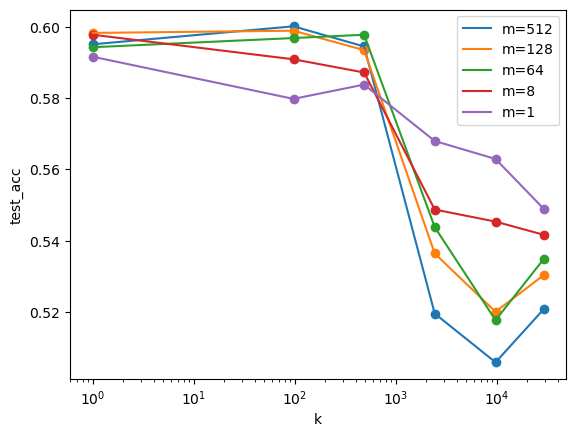

In [8]:
# plot for k
for m in df.m.unique():
    df_filtered = df[df.m == m]
    plt.scatter(df_filtered.k, df_filtered.test_acc)
    plt.plot(df_filtered.k, df_filtered.test_acc, label=f'm={m}')

plt.xscale('log')
plt.xlabel('k')
plt.ylabel('test_acc')
plt.legend();

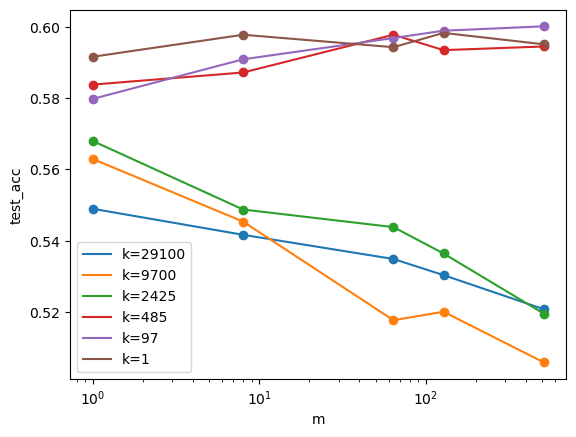

In [9]:
# plot for m
for k in df.k.unique():
    df_filtered = df[df.k == k]
    plt.scatter(df_filtered.m, df_filtered.test_acc)
    plt.plot(df_filtered.m, df_filtered.test_acc, label=f'k={k}')

plt.xscale('log')
plt.xlabel('m')
plt.ylabel('test_acc')
plt.legend();

### Cifar sequential sweep over k to find bump

In [10]:
df_k = get_sweep_dataframe('kehid6px')
df_k.head()

run_id                                               name     state  \
0  2o0itxee  cifar10_sequential_k=29100_m=512_p=0.5_lr=0.00...  finished   
1  33chj9rn  cifar10_sequential_k=29100_m=512_p=0.5_lr=0.00...  finished   
2  i89mg90d  cifar10_sequential_k=29100_m=512_p=0.5_lr=0.00...  finished   
3  vyhuw569  cifar10_sequential_k=29100_m=1_p=0.5_lr=0.0005...  finished   
4  7hcqebfa  cifar10_sequential_k=29100_m=1_p=0.5_lr=0.0005...  finished   

       k    m    p      lr  seed device  epochs  ...  test_batch_size  \
0  29100  512  0.5  0.0005   284   cuda     300  ...              512   
1  29100  512  0.5  0.0005   283   cuda     300  ...              512   
2  29100  512  0.5  0.0005   282   cuda     300  ...              512   
3  29100    1  0.5  0.0005   284   cuda     300  ...              512   
4  29100    1  0.5  0.0005   283   cuda     300  ...              512   

   preprocess_dataset  test_acc    test_loss    _timestamp  train_batch_loss  \
0               False  0.531558   964.090424  1.682452e+09          0.028488   
1               False  0.512644  1014.798111  1.682452e+09          0.815736   
2               False  0.526521   954.253700  1.682451e+09          0.044360   
3               False  0.538651    46.665724  1.682452e+09          0.066207   
4               False  0.533306    44.914529  1.682451e+09          0.042341   

   train_epoch_loss     _step            _wandb    _runtime  
0          9.739902  14899200  {'runtime': 191}  191.783334  
1         17.832019  14899200  {'runtime': 189}  190.200197  
2         12.024767  14899200  {'runtime': 191}  191.441020  
3          5.426840  14899200  {'runtime': 458}  459.118572  
4          5.365594  14899200  {'runtime': 189}  189.703217  

[5 rows x 35 columns]

In [11]:
# different k values
for k in df_k.k.unique():
    print(f'k={k}: {k // BATCHES_PER_EPOCH} epochs with same mask, {epochs * BATCHES_PER_EPOCH // k} different masks')

k=29100: 300 epochs with same mask, 1 different masks
k=9700: 100 epochs with same mask, 3 different masks
k=2425: 25 epochs with same mask, 12 different masks
k=1940: 20 epochs with same mask, 15 different masks
k=1455: 15 epochs with same mask, 20 different masks
k=970: 10 epochs with same mask, 30 different masks
k=485: 5 epochs with same mask, 60 different masks
k=97: 1 epochs with same mask, 300 different masks
k=1: 0 epochs with same mask, 29100 different masks


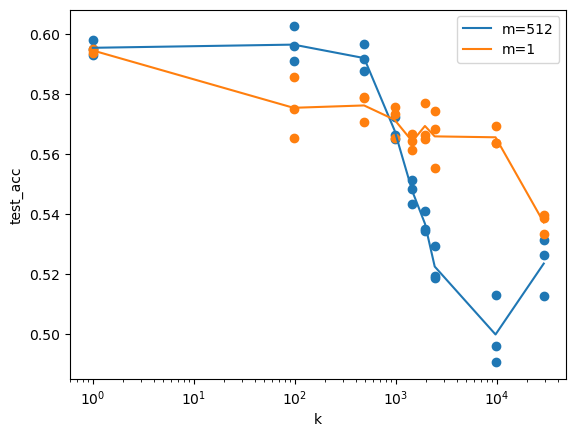

In [12]:
# plot for k
for m in df_k.m.unique():
    df_filtered = df_k[df_k.m == m]
    df_means = df_filtered.groupby('k').mean(numeric_only=True)
    plt.scatter(df_filtered.k, df_filtered.test_acc)
    plt.plot(df_means.index, df_means.test_acc, label=f'm={m}')

plt.xscale('log')
plt.xlabel('k')
plt.ylabel('test_acc')
plt.legend();

### No dropout vs. standard vs. sequential baselines

In [13]:
df_no = get_sweep_dataframe('6sxbqxn3')
df_std = get_sweep_dataframe('1xiu49jn')
df_seq = get_sweep_dataframe('2pnf6l0e')

len(df_no), len(df_std), len(df_seq)

(5, 5, 20)

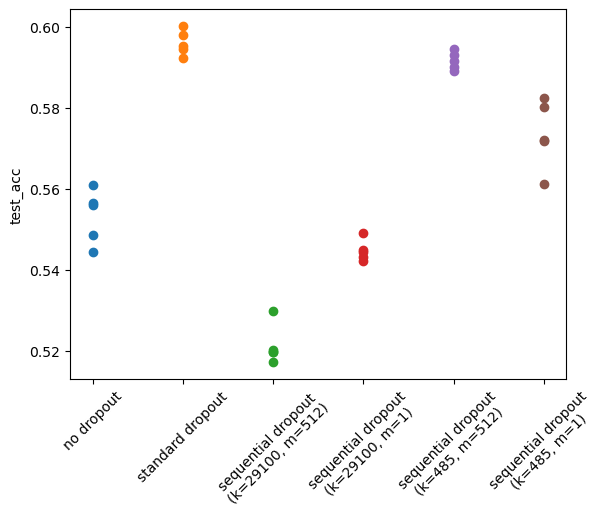

In [14]:
ks = df_seq.k.unique()
ms = df_seq.m.unique()

plt.scatter(['no dropout' for _ in range(len(df_no))], df_no.test_acc)
plt.scatter(['standard dropout' for _ in range(len(df_std))], df_std.test_acc)
for k in ks:
    for m in ms:
        df_filtered = df_seq[(df_seq.k == k) & (df_seq.m == m)]
        plt.scatter([f'sequential dropout\n(k={k}, m={m})' for _ in range(len(df_filtered))], df_filtered.test_acc)

plt.ylabel('test_acc')
plt.xticks(rotation=45);

### Subnet experiments

In [25]:
def get_run_config(run_id):
    run = api.run(f'k-dropout/{run_id}')
    return run.config

def get_run_summary(run_id):
    run = api.run(f'k-dropout/{run_id}')
    return run.summary

In [16]:
def get_run_metric(run_id, keys=None):
    run = api.run(f'k-dropout/{run_id}')
    if isinstance(keys, str):
        keys = [keys]
    if keys is None:
        return run.history(keys=keys, samples=1_000_000)
    return run.history(keys=keys, samples=1_000_000)[keys]

In [58]:
def plot_subnet_training(
        run_id, metric='acc', type='mask', limit_subnets=-1, mask_lines=True,
        skip_pretraining_step=True, n_cols=3, col_size=5, row_size=4):
    METRICS = ('acc', 'loss')
    TYPES = ('mask', 'random')
    if metric not in METRICS:
        raise ValueError(f'metric must be one of {METRICS}')
    if type not in TYPES:
        raise ValueError(f'type must be one of {TYPES}')

    run_config = get_run_config(run_id)
    k = run_config['k']
    m = run_config['m']
    epochs = run_config['epochs']
    n_random_subnets = run_config['n_random_subnets']

    n_masks = epochs * BATCHES_PER_EPOCH // k
    epochs_per_mask = epochs / n_masks

    n_subnets = n_masks if type == 'mask' else n_random_subnets
    if limit_subnets > 0:
        n_subnets = min(n_subnets, limit_subnets)
    metric_cols = [f'test_{metric}_{type}_{i}' for i in range(n_subnets)]
    metric_df = get_run_metric(run_id, metric_cols)

    # plot test accuracy for each mask
    n_rows = round(n_subnets / n_cols + 0.5)
    fig, axes = plt.subplots(
        n_rows, n_cols, figsize=(col_size * n_cols, row_size * n_rows), sharey=True)
    axes = axes.reshape((-1, n_cols))  # handle 1 row case

    for i, ax in enumerate(axes.flatten()):
        if i >= n_subnets:
            ax.axis('off')
            continue

        if skip_pretraining_step:
            ax.plot(metric_df[metric_cols[i]][1:])
        else:
            ax.plot(metric_df[metric_cols[i]])
        ax.set_title(f'{type} subnet {i}')

        if type == 'mask':
            training_start = i * epochs_per_mask
            training_end = (i + 1) * epochs_per_mask
            ax.axvspan(training_start, training_end, color='red', alpha=.2)
        if mask_lines:
            for j in range(n_masks + 1):
                ax.axvline(x=epochs_per_mask * j, color='black',
                           linestyle='--', alpha=.5, linewidth=.5)

        if i % n_cols == 0:
            ax.set_ylabel(f'test_{metric}')

    fig.suptitle(f'Sequential k-dropout k={k}, m={m} {type} subnets\n', fontsize=24)
    fig.tight_layout()

    plt.show()

In [52]:
def plot_full_training(run_id, metric='acc', mask_lines=True, skip_pretraining_step=True):
    METRICS = ('acc', 'loss')
    if metric not in METRICS:
        raise ValueError(f'metric must be one of {METRICS}')

    run_config = get_run_config(run_id)
    k = run_config['k']
    m = run_config['m']
    epochs = run_config['epochs']

    n_masks = epochs * BATCHES_PER_EPOCH // k
    epochs_per_mask = epochs / n_masks

    metric_col = f'test_{metric}_full'
    metric_df = get_run_metric(run_id, metric_col)

    if skip_pretraining_step:
        plt.plot(metric_df[metric_col][1:])
    else:
        plt.plot(metric_df[metric_col])

    if mask_lines:
        for j in range(n_masks + 1):
            plt.axvline(x=epochs_per_mask * j, color='black',
                        linestyle='--', alpha=.5, linewidth=.5)

    plt.title(f'Sequential k-dropout k={k}, m={m} full network')
    plt.ylabel(f'test_{metric}')
    plt.show()

In [61]:
def plot_subnet_performance(run_id, metric='acc'):
    METRICS = ('acc', 'loss')
    if metric not in METRICS:
        raise ValueError(f'metric must be one of {METRICS}')

    run_config = get_run_config(run_id)
    k = run_config['k']
    m = run_config['m']
    epochs = run_config['epochs']
    n_random_subnets = run_config['n_random_subnets']

    n_masks = epochs * BATCHES_PER_EPOCH // k
    epochs_per_mask = epochs / n_masks

    mask_cols = [f'test_{metric}_mask_{i}' for i in range(n_masks)]
    random_cols = [f'test_{metric}_random_{i}' for i in range(n_random_subnets)]

    summary = get_run_summary(run_id)

    mask_values = [summary[c] for c in mask_cols]
    random_values = [summary[c] for c in random_cols]
    plt.scatter(range(n_masks), mask_values, label='dropout subnets')
    plt.scatter(np.linspace(0, n_masks - 1, n_random_subnets), random_values, color='r', alpha=.5, label='random subnets')
    plt.axhline(y=np.array(random_values).mean(), color='r', alpha=.5, label='random subnets (mean)')

    plt.title(f'Sequential k-dropout k={k}, m={m}')
    plt.xlabel('mask index')
    plt.ylabel(f'test_{metric}')
    plt.legend()
    plt.show()

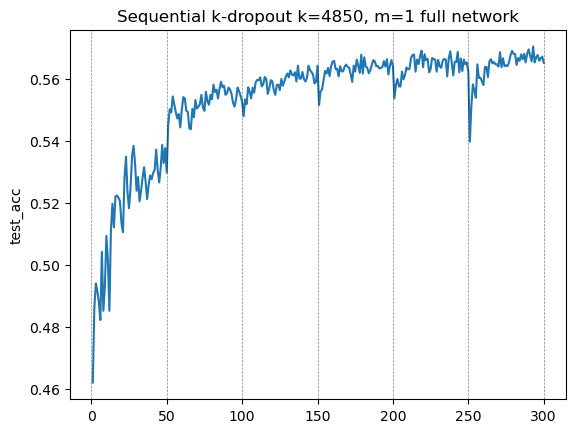

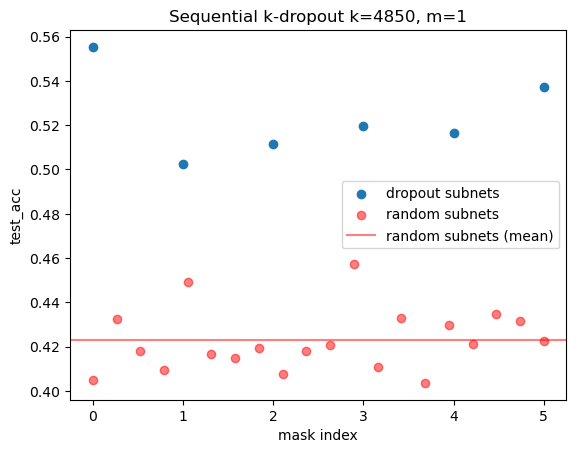

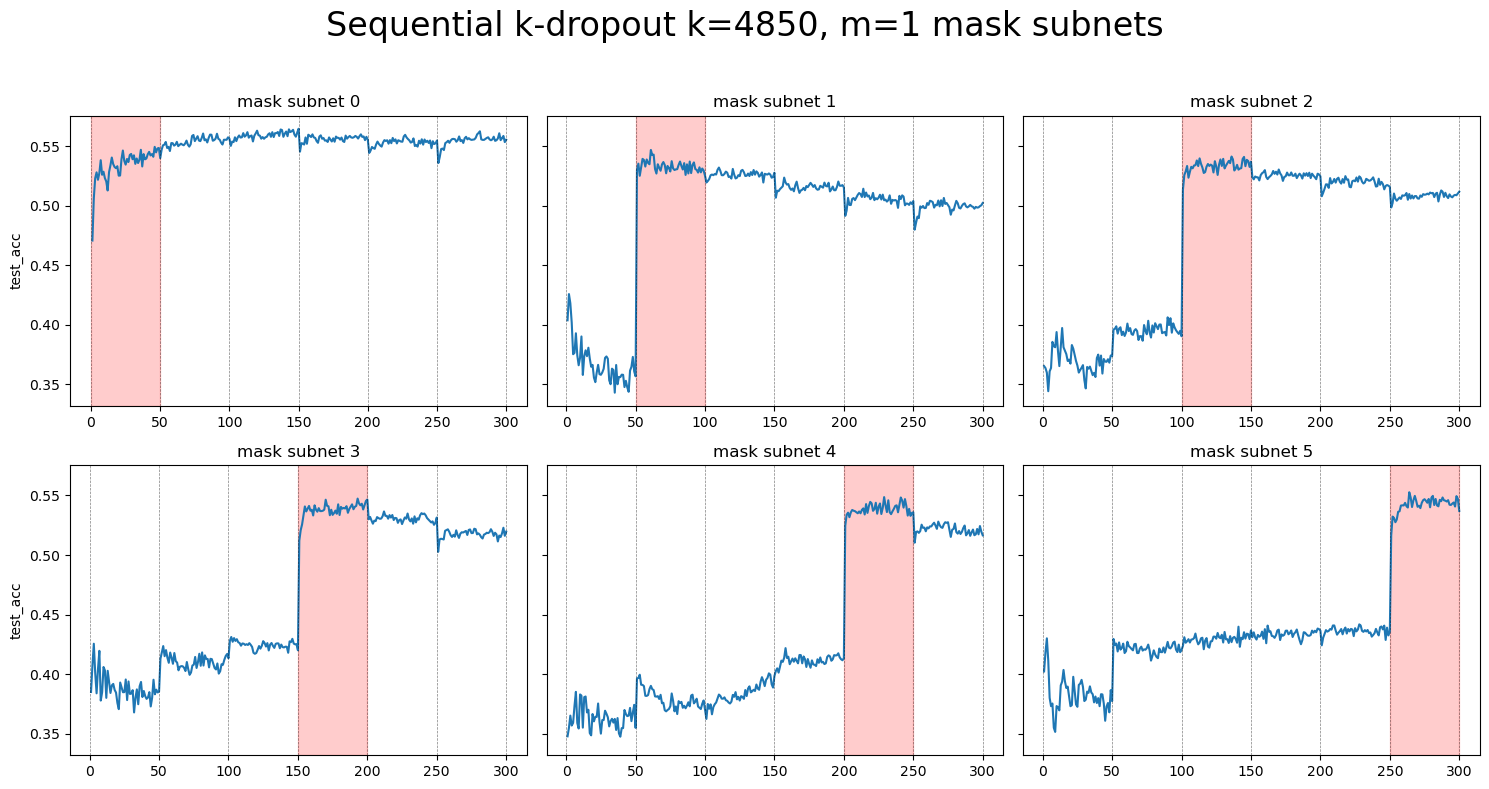

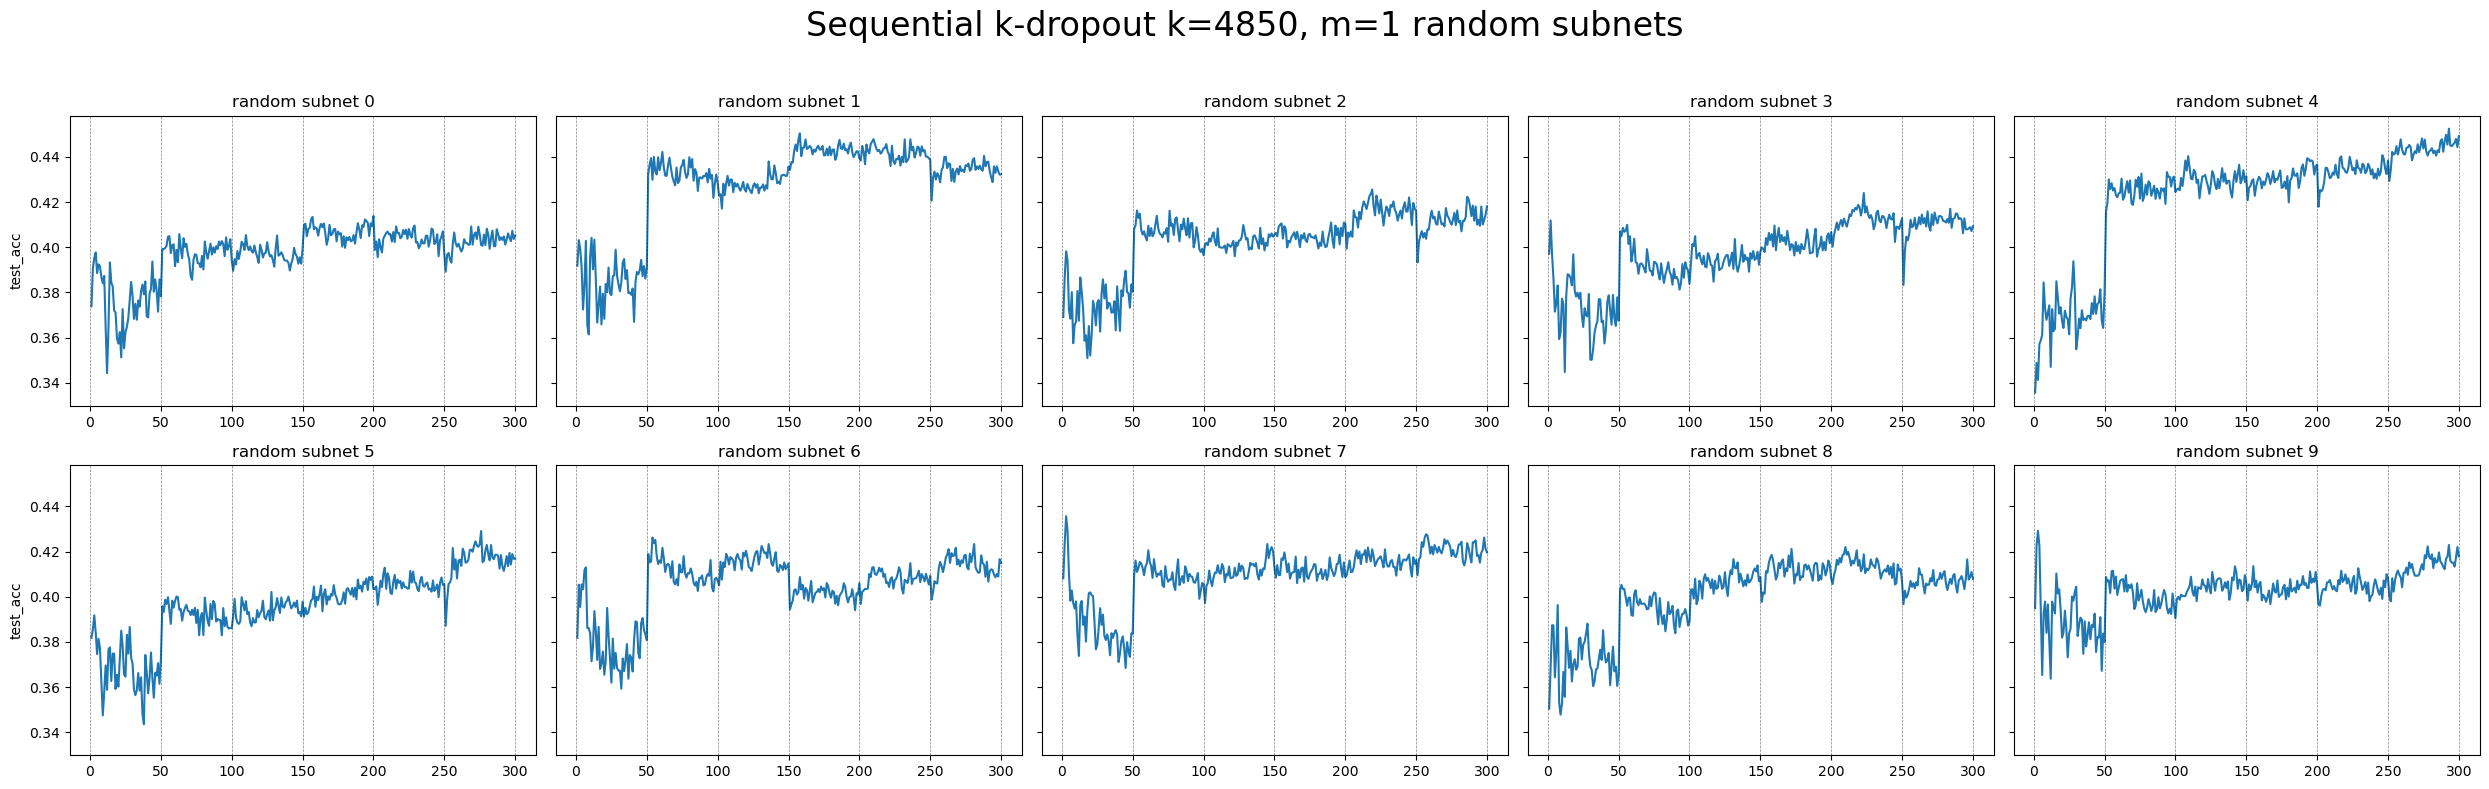

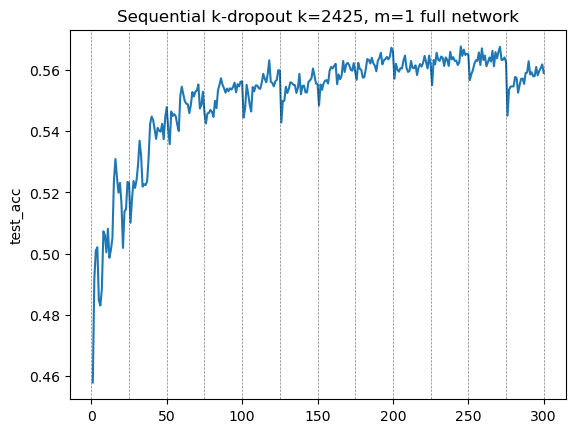

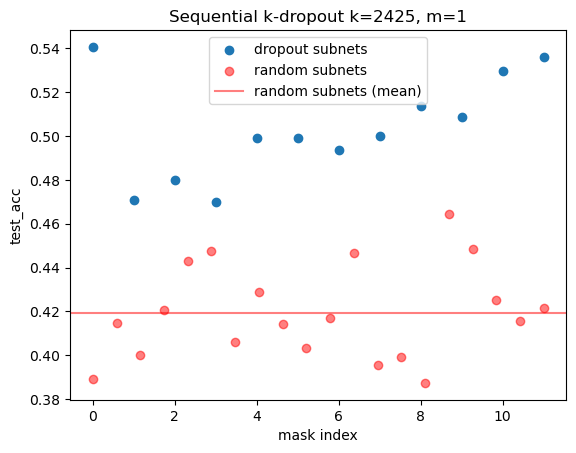

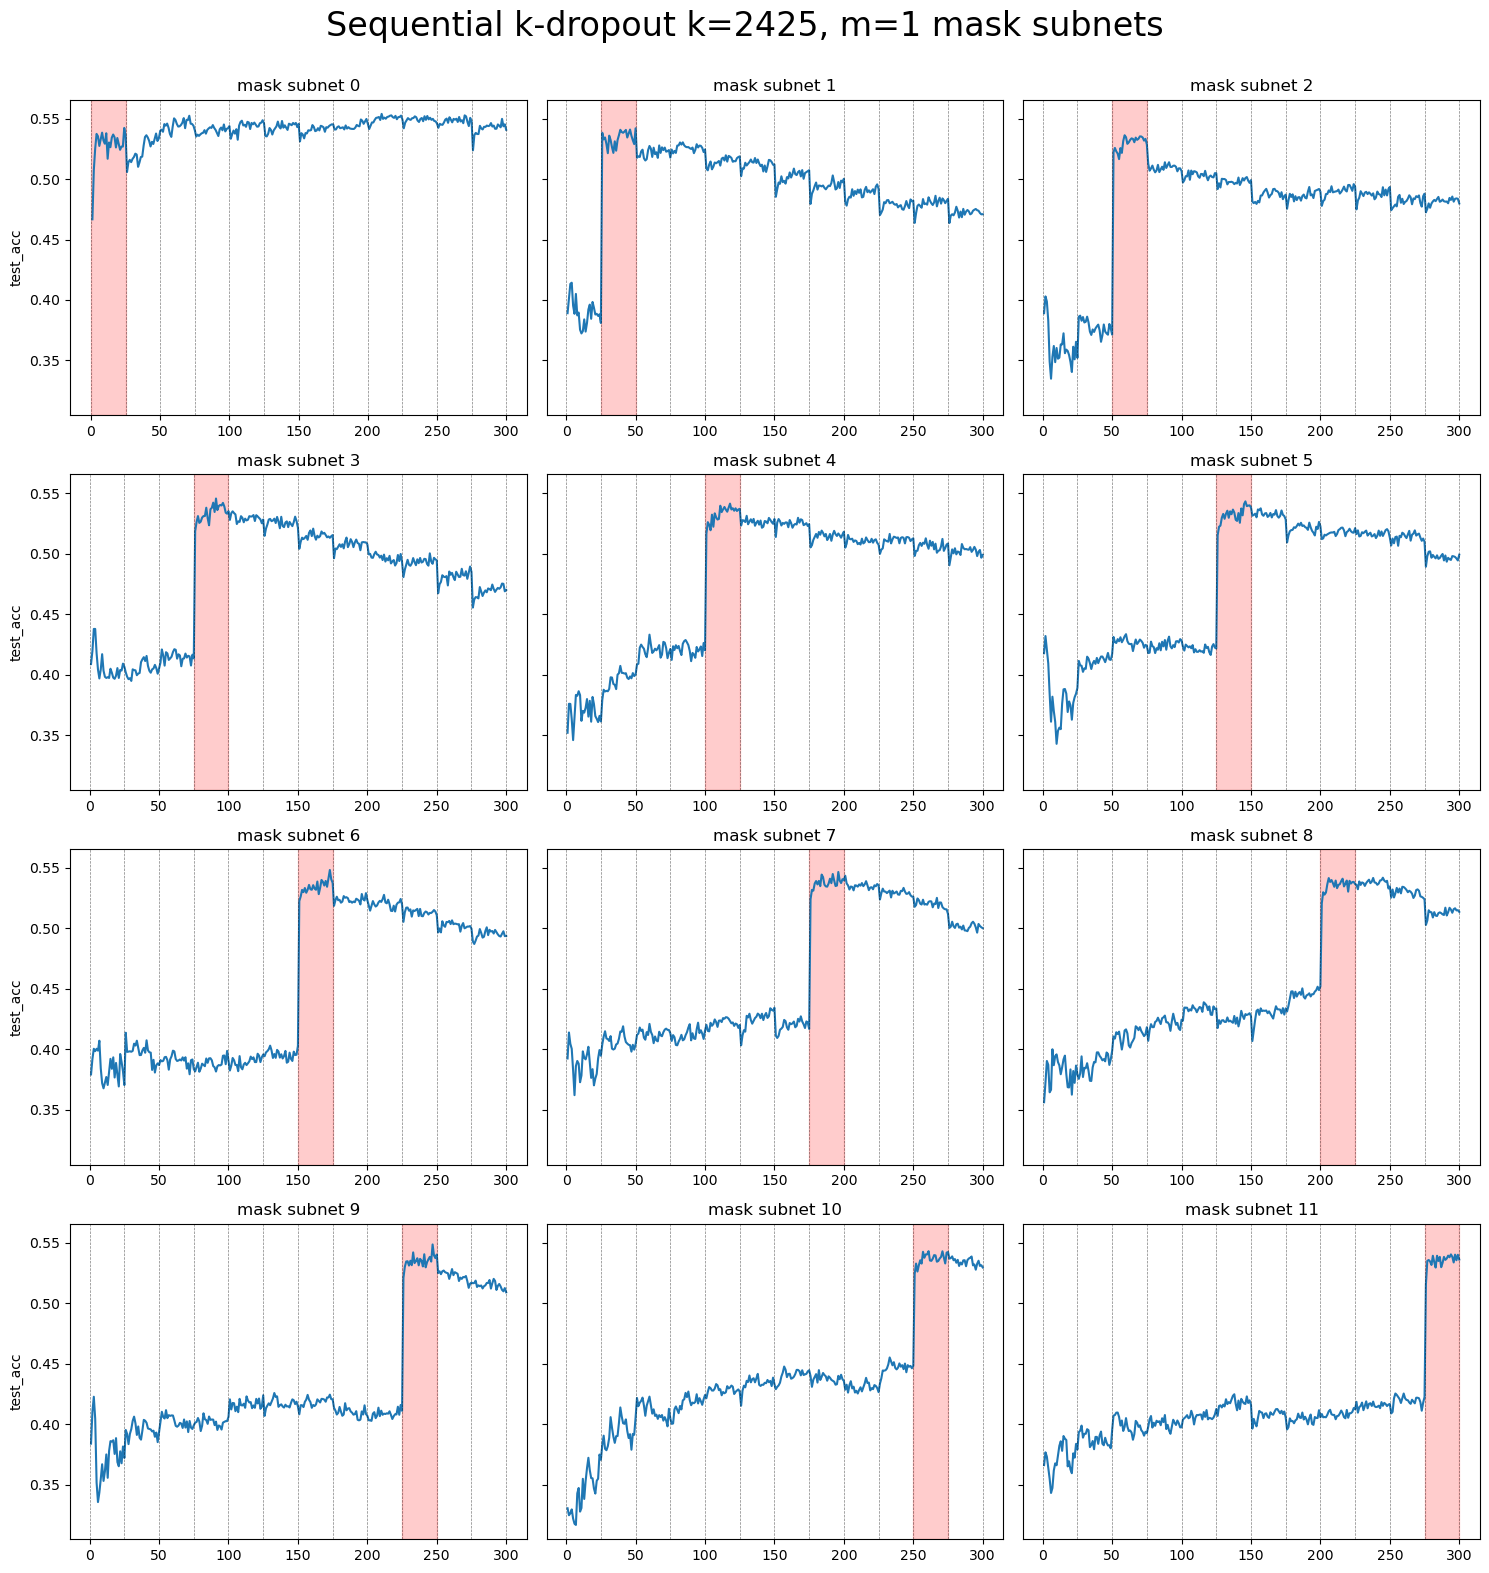

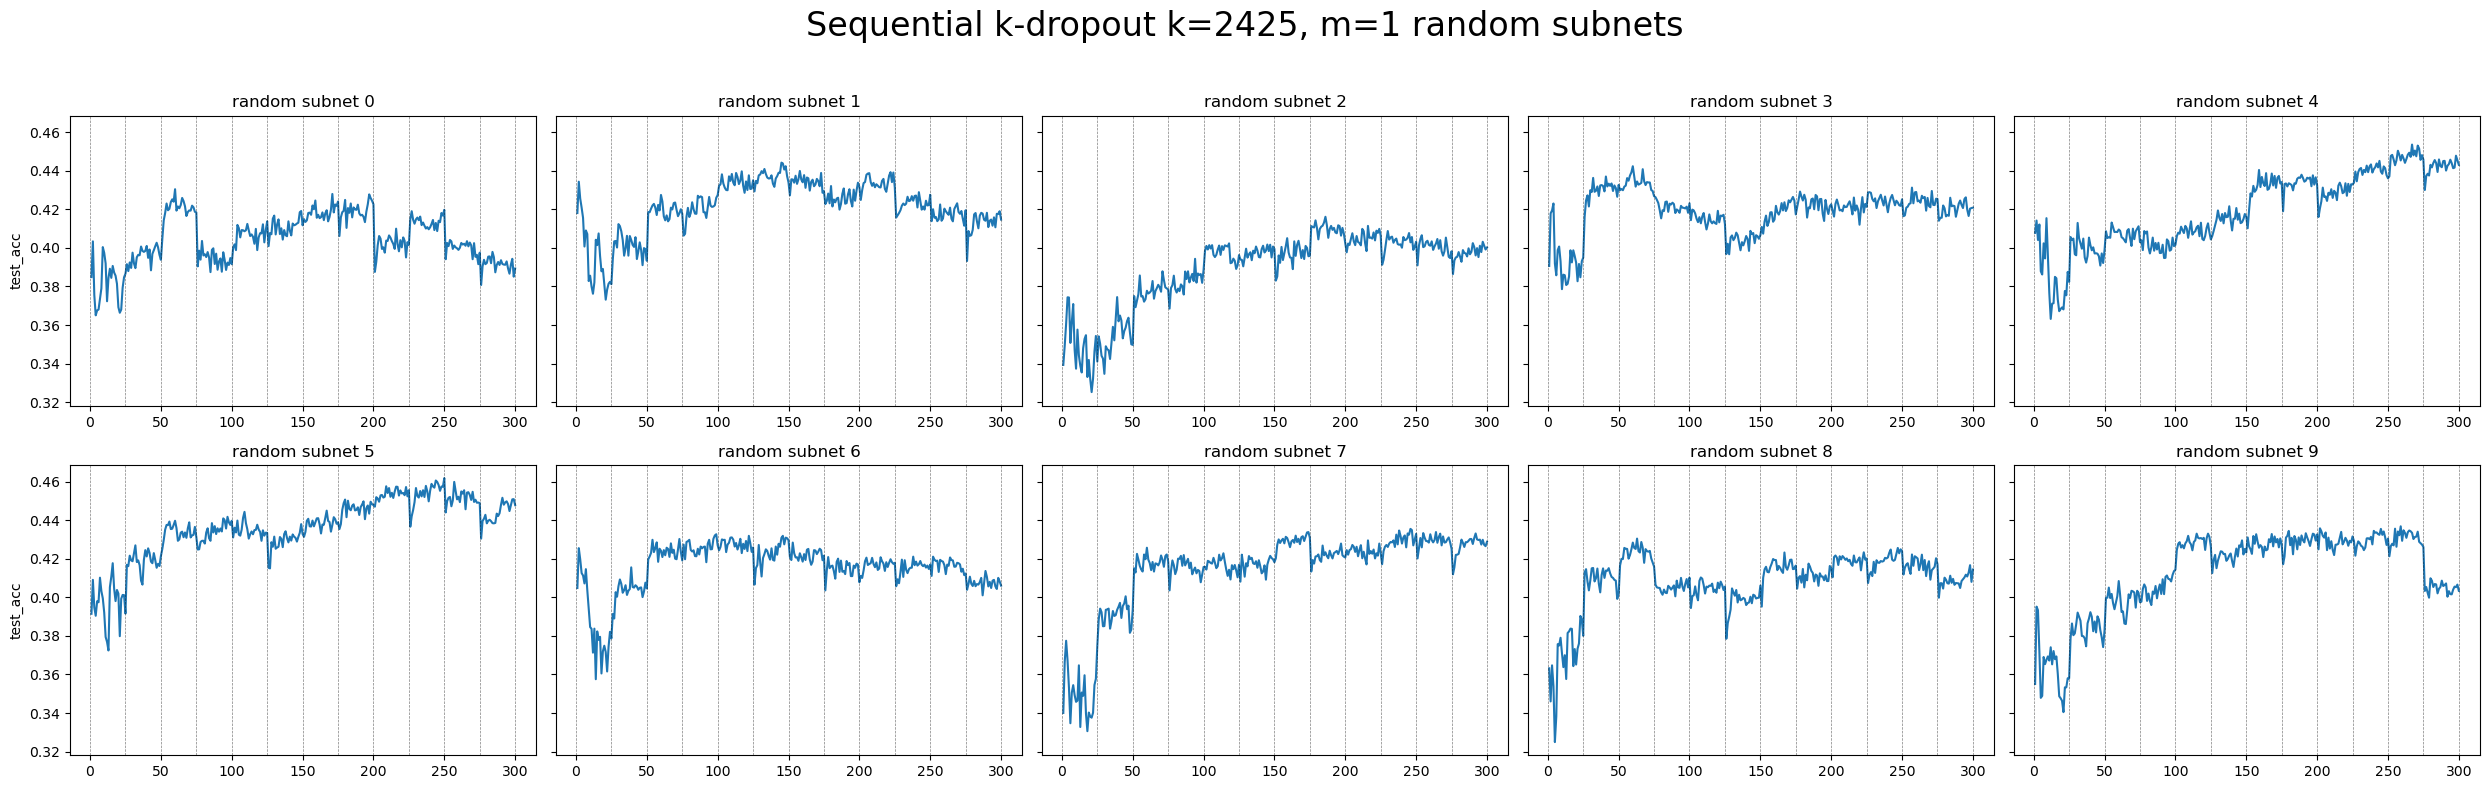

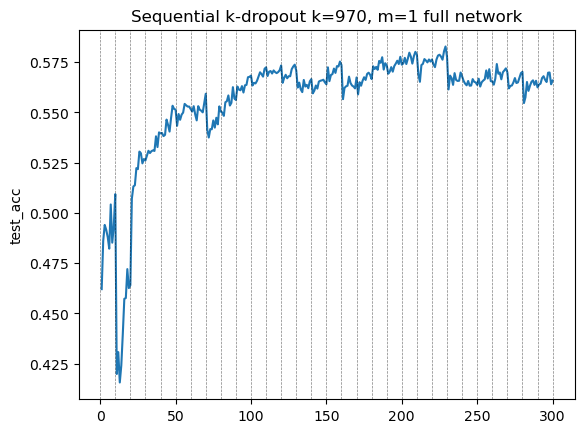

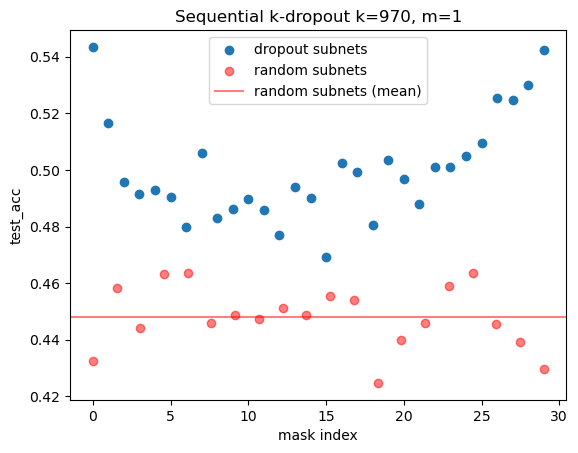

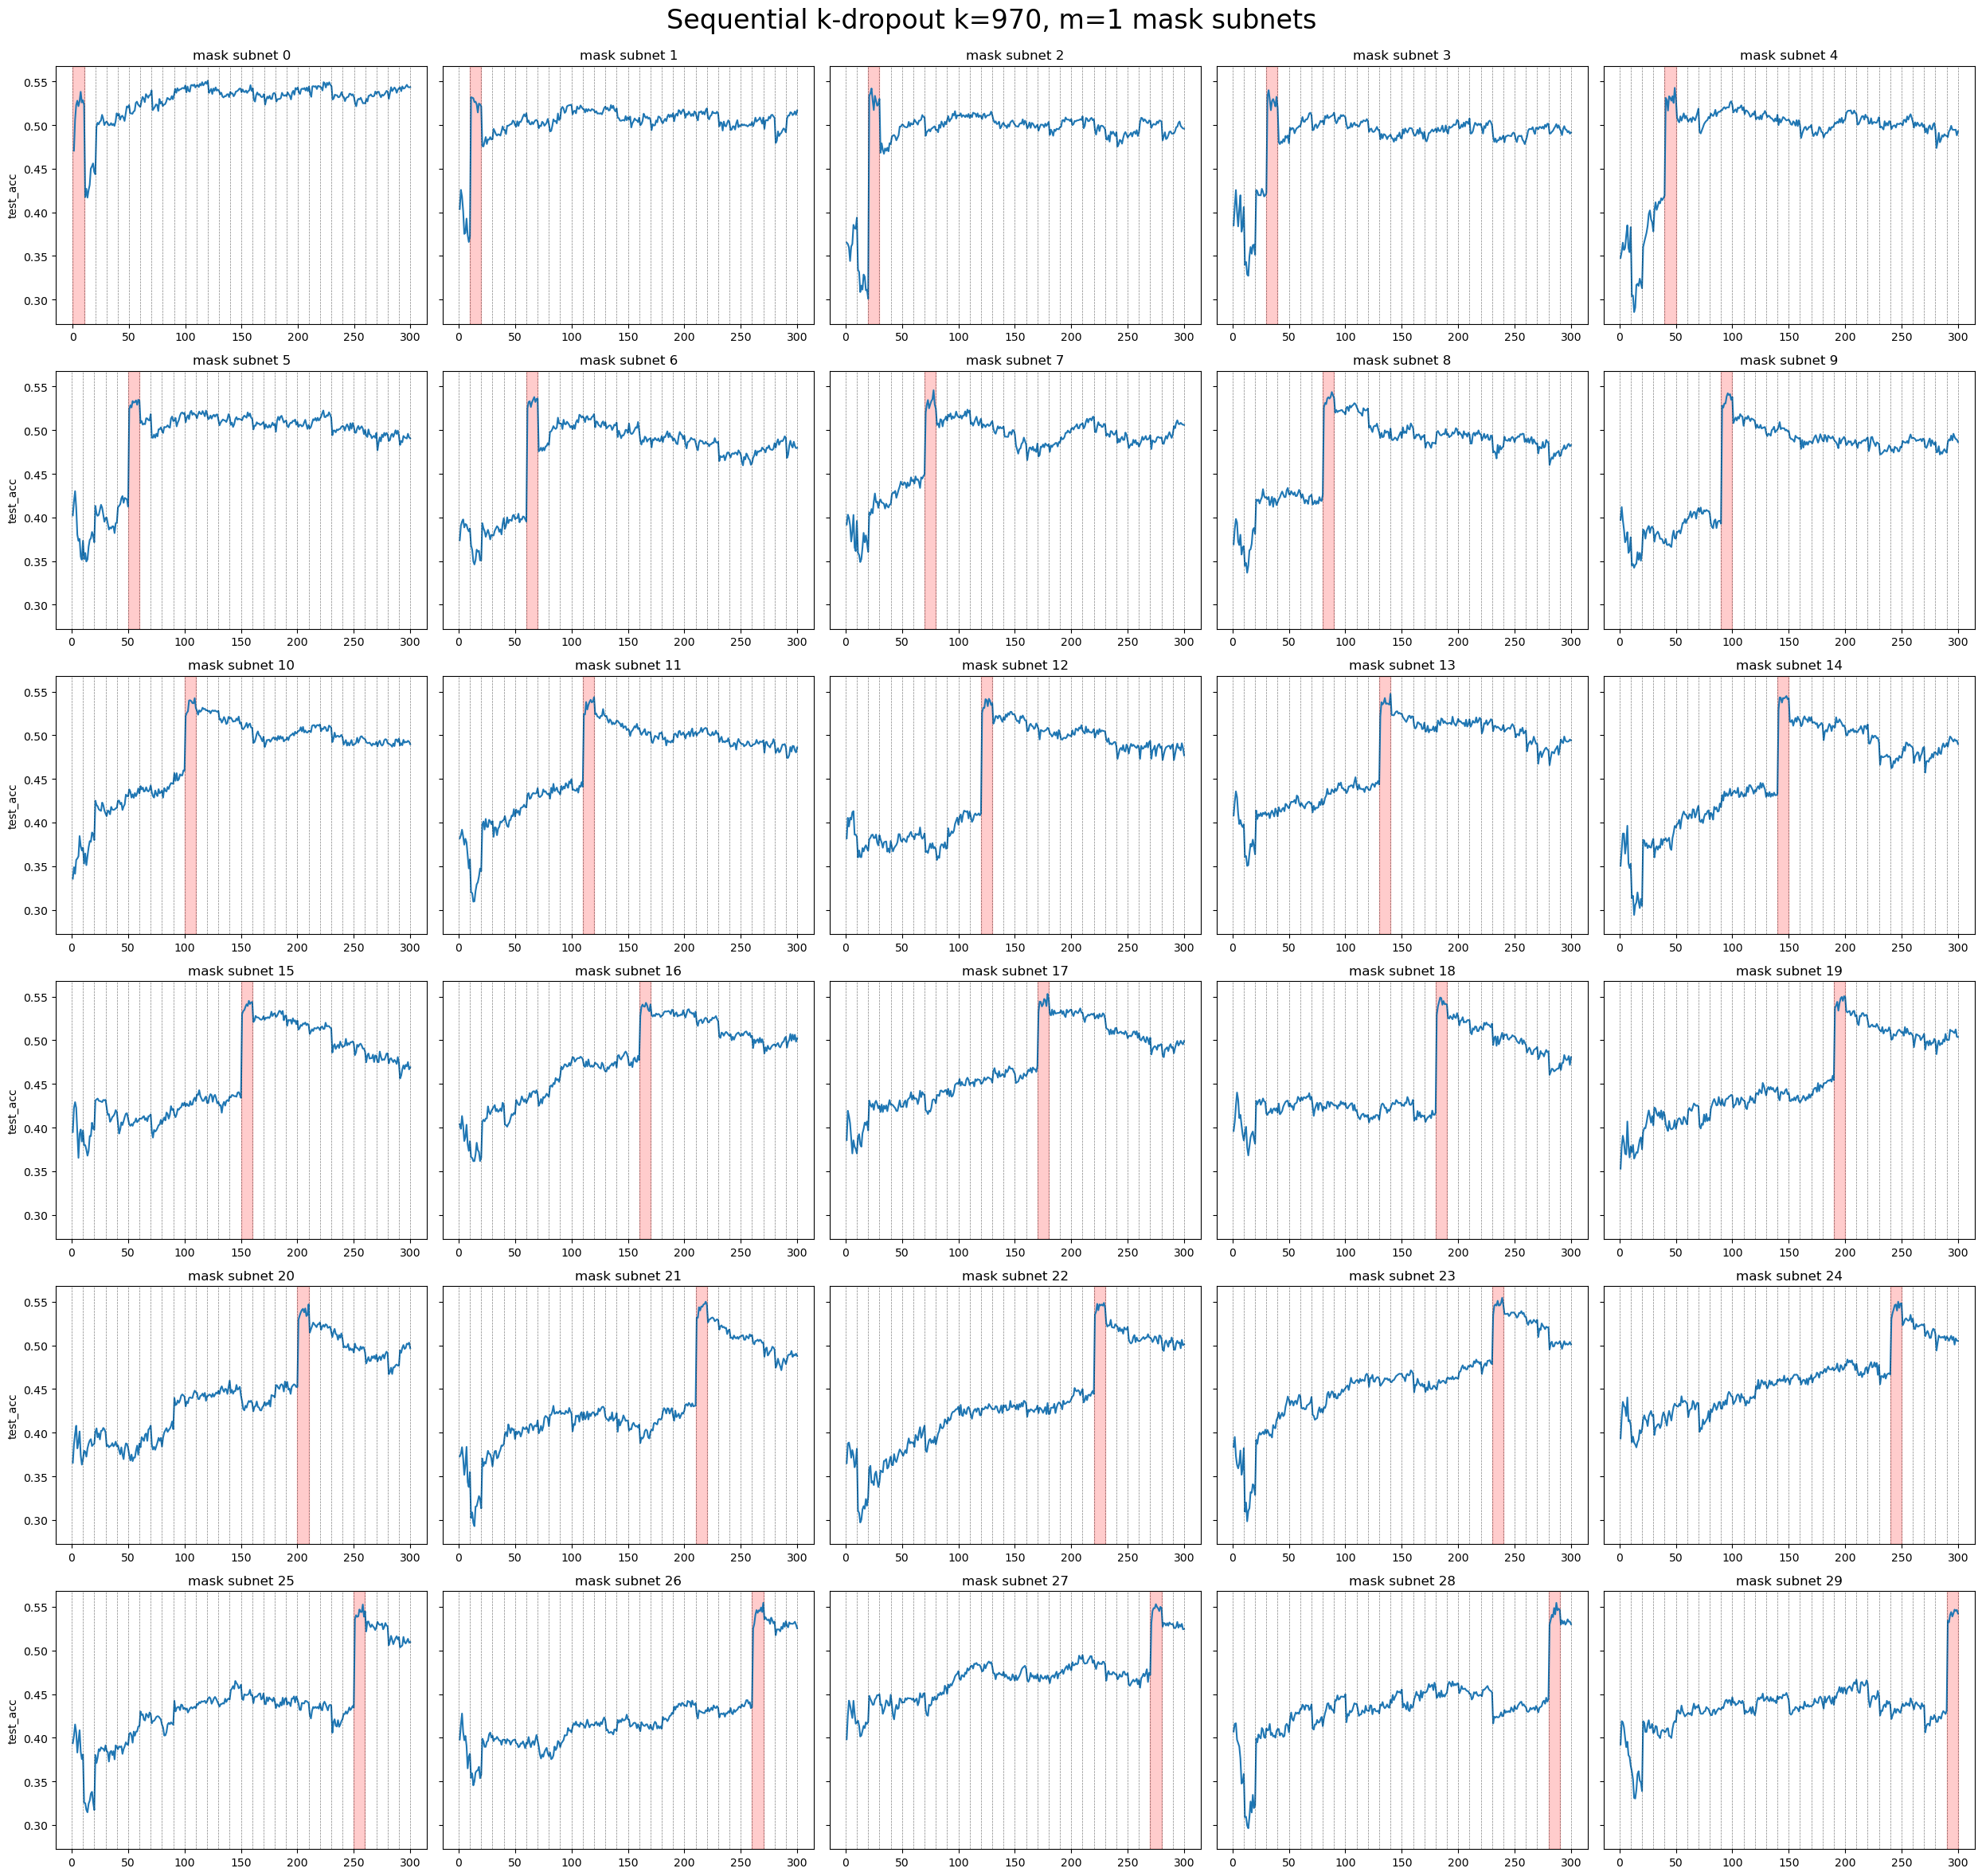

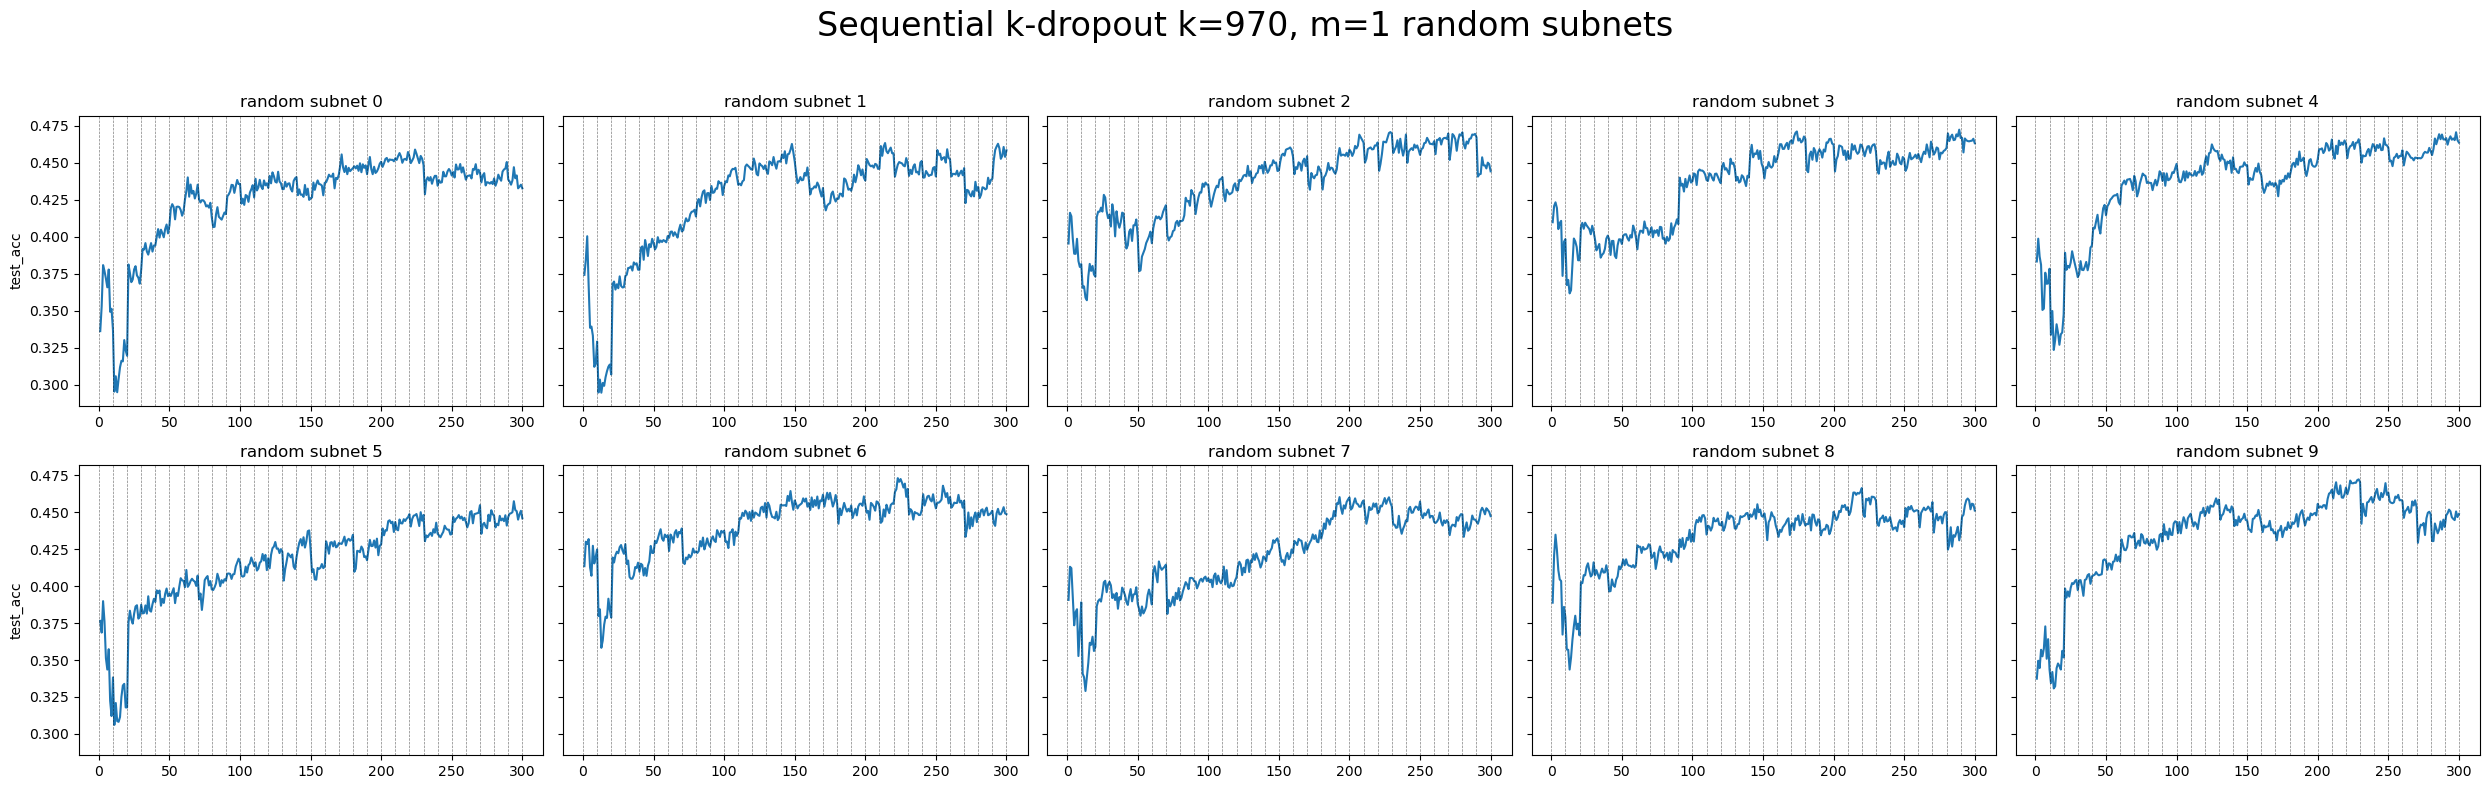

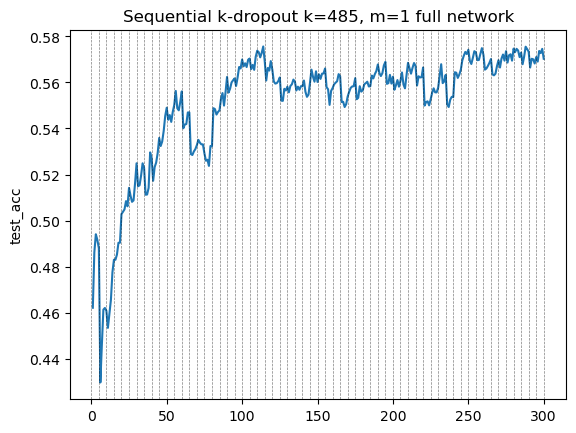

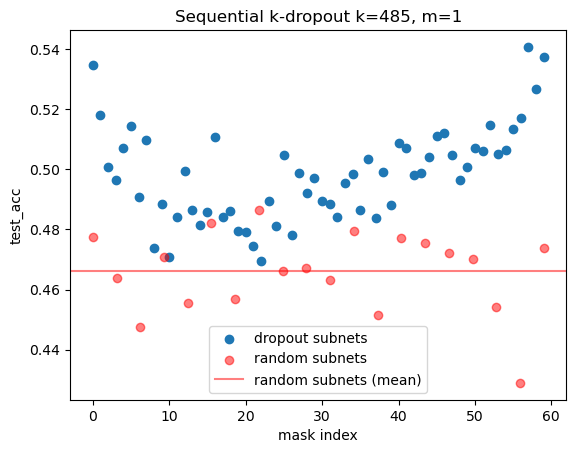

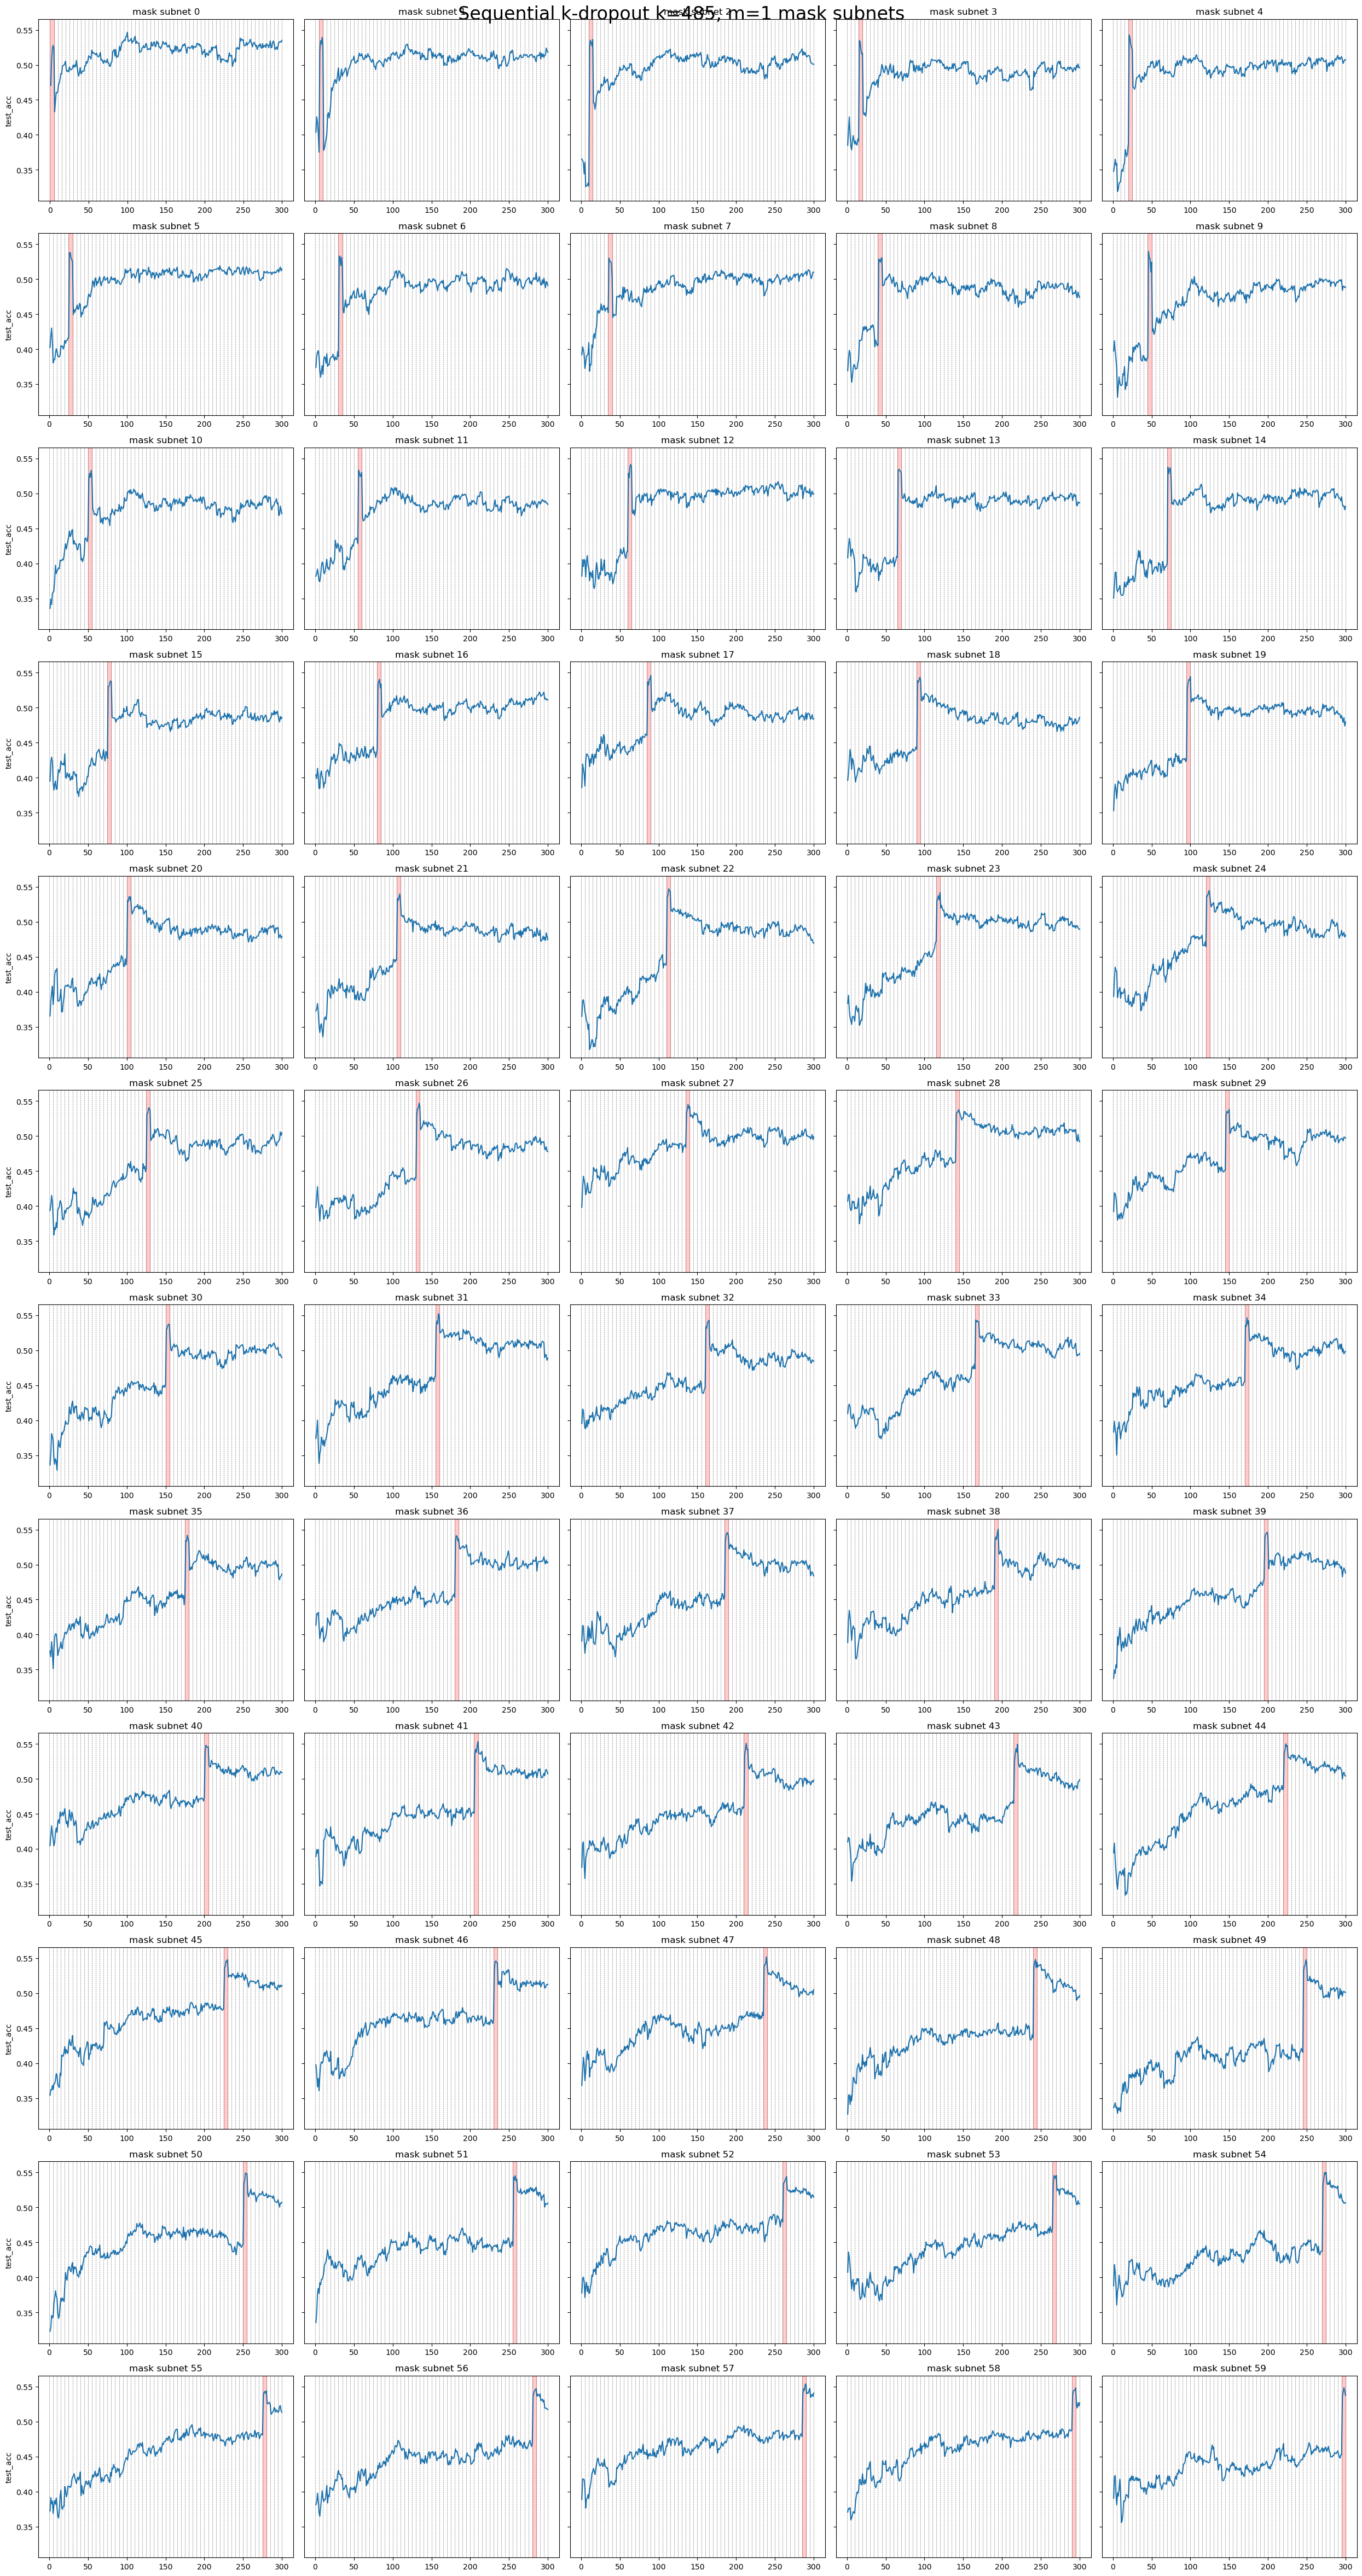

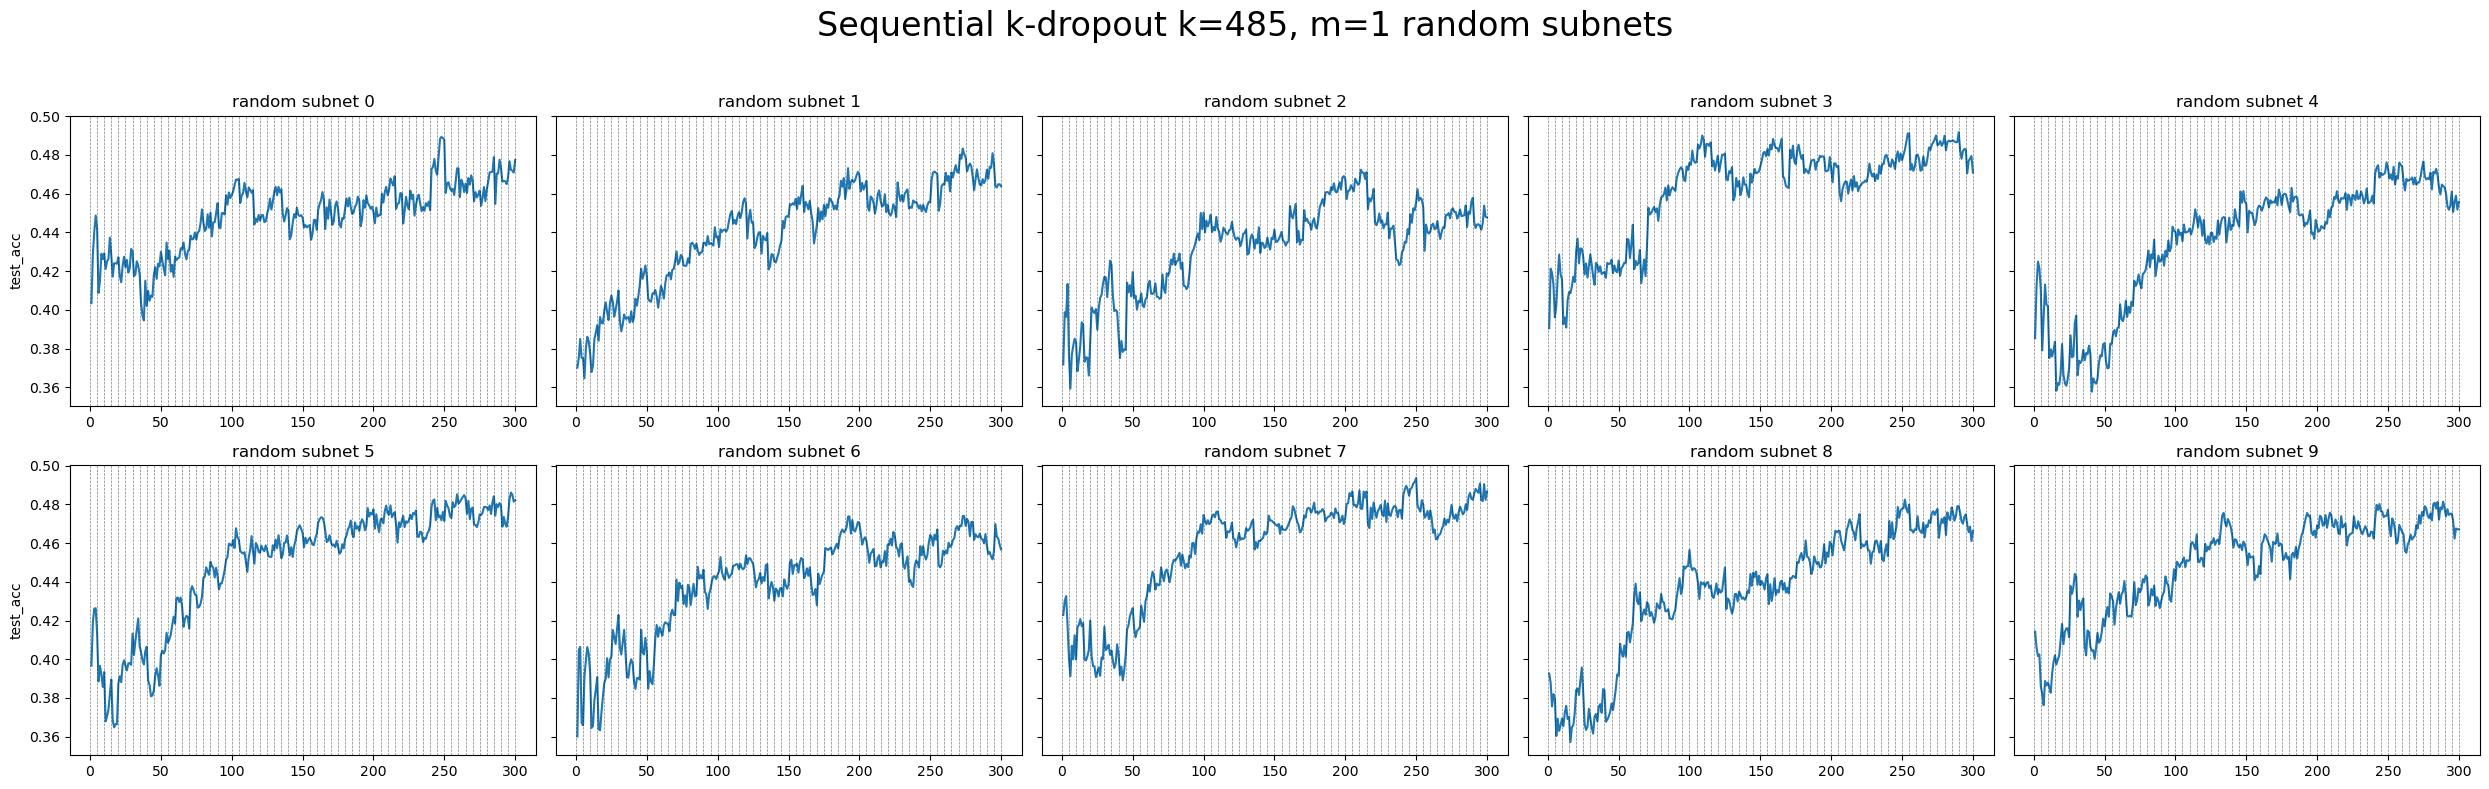

In [63]:
run_info = (
    (6, 'nbtyh4if'),  # k=4850, 6 masks
    (12, '46z6q7cg'),  # k=2425, 12 masks
    (30, 'eboeg7dc'),  # k=970, 30 masks
    (60, '283zn3jw'),  # k=485, 60 masks
)

for n_masks, run_id in run_info:
    plot_full_training(run_id)
    plot_subnet_performance(run_id)
    plot_subnet_training(run_id, n_cols=5 if n_masks >= 30 else 3)
    # plot_subnet_training(run_id, metric='loss')
    plot_subnet_training(run_id, type='random', n_cols=5, limit_subnets=10)

In [ ]:
# TODO: 300 mask cup plot